In [ ]:
import pandas as pd # type: ignore

: 

In [ ]:
from sklearn.datasets import make_regression # pyright: ignore[reportMissingModuleSource]
import numpy as np

In [219]:
n_samples = 5
X,y = make_regression(n_samples=n_samples, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=80)

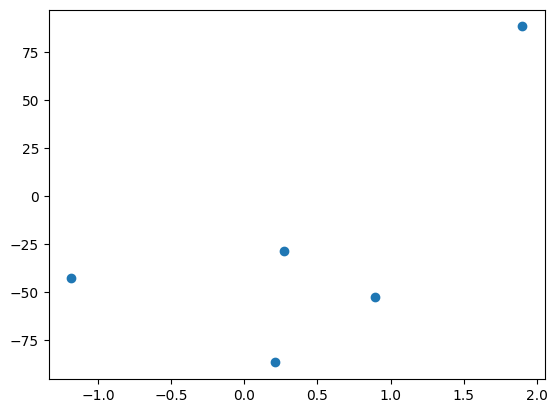

In [220]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [221]:
# Lets apply OLS
from sklearn. linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

In [222]:
reg.coef_, reg.intercept_

(array([38.97036839]), np.float64(-40.77984061856081))

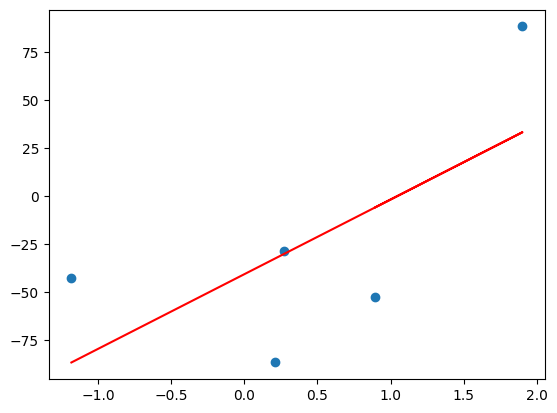

In [223]:
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='red')

## Let's Apply Gradient Descent from Scratch

In [224]:
X

array([[-1.18072916],
       [ 0.20880295],
       [ 0.27353254],
       [ 1.89985294],
       [ 0.89521104]])

In [225]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((reg.coef_ * X) + 0).reshape(n_samples)
y_pred

array([-46.0134502 ,   8.13712801,  10.65966384,  74.03796882,
        34.88670384])

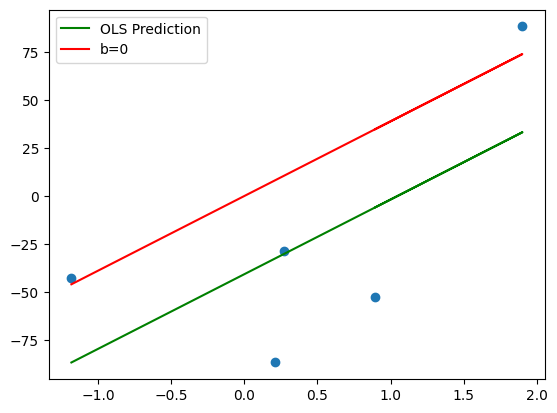

In [226]:
#let's plot the value
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='green', label='OLS Prediction')
plt.plot(X, y_pred, color='red', label='b=0')
plt.legend()

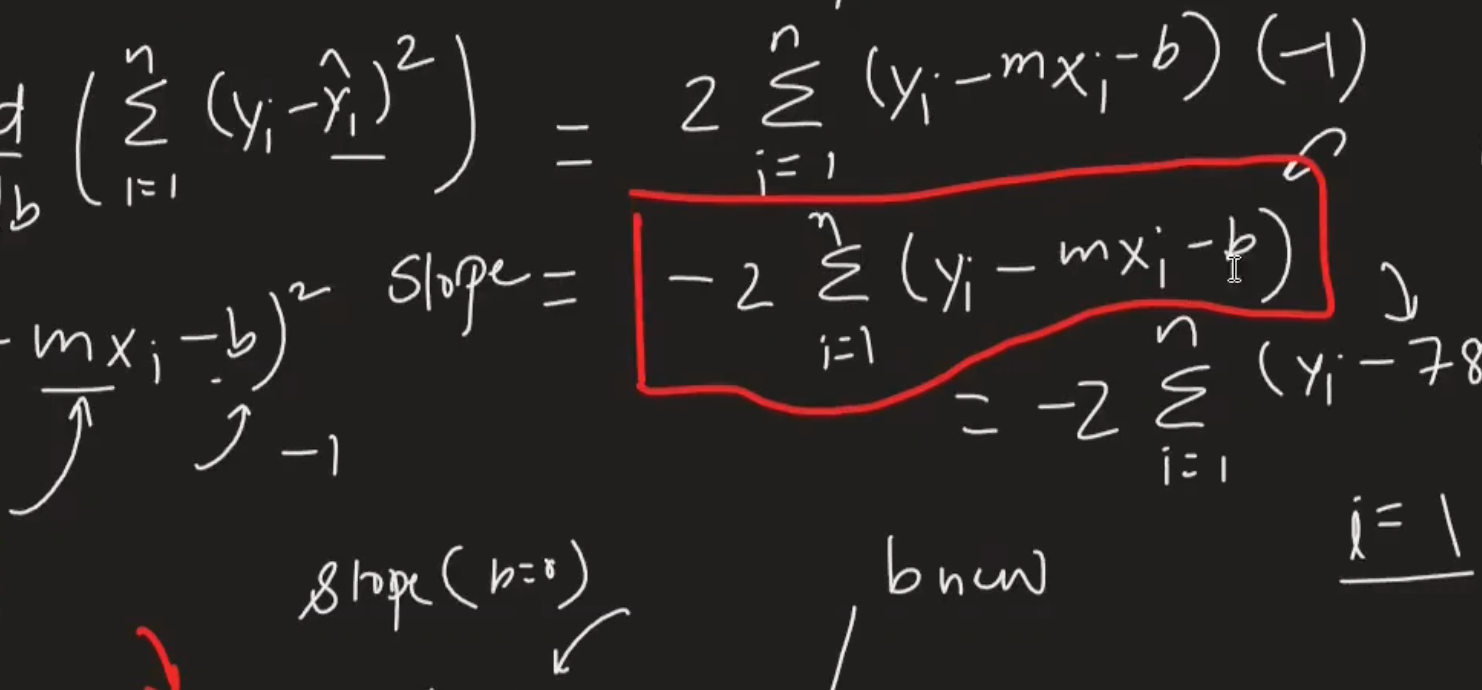

In [227]:
#Calculating slope at b=0
m = reg.coef_[0]
b = 0
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(407.7984061856082)

In [228]:
# Lets take learning rate = 0.1
lr = 0.1
step_size = loss_slope*lr
step_size

np.float64(40.779840618560826)

In [229]:
b = b - step_size
b

np.float64(-40.779840618560826)

In [230]:
y_pred = ((reg.coef_[0] * X) + b).reshape(n_samples)
y_pred0 = ((reg.coef_[0] * X) + 0).reshape(n_samples)

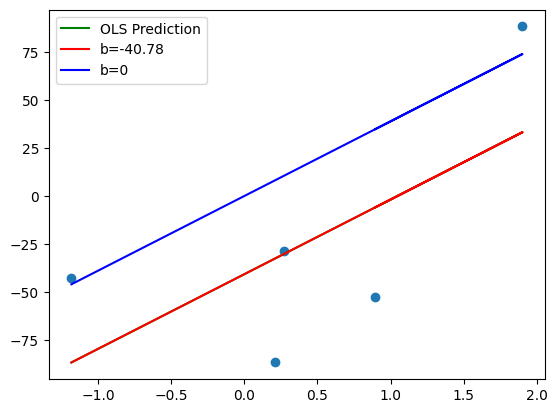

In [231]:
#let's plot the value
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='green', label='OLS Prediction')
plt.plot(X, y_pred, color='red', label='b={0:.2f}'.format(b))
plt.plot(X, y_pred0, color='blue', label='b=0')
plt.legend()

In [232]:
#Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope*lr
b = b - step_size
b

np.float64(-40.77984061856081)

In [233]:
y_pred1 = ((reg.coef_[0] * X) + b).reshape(n_samples)

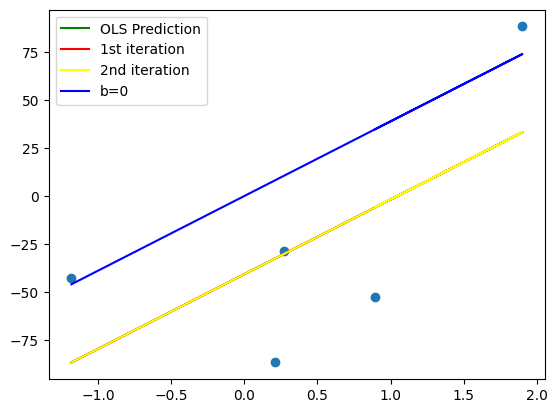

In [234]:
#let's plot the value
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='green', label='OLS Prediction')
plt.plot(X, y_pred, color='red', label='1st iteration')
plt.plot(X, y_pred1, color='yellow', label='2nd iteration')
plt.plot(X, y_pred0, color='blue', label='b=0')
plt.legend()

In [235]:
#Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
step_size = loss_slope*lr
b = b - step_size
b

np.float64(-40.77984061856081)

In [236]:
y_pred2 = ((reg.coef_[0] * X) + b).reshape(n_samples)

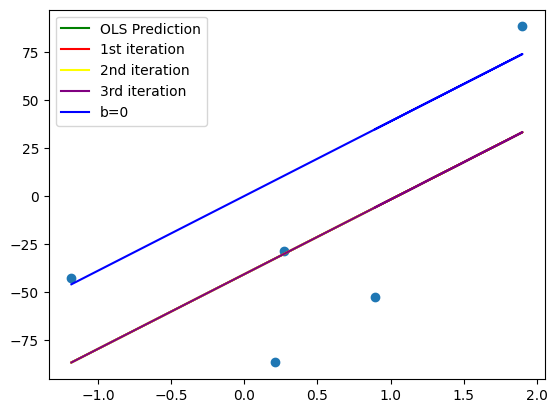

In [237]:
#let's plot the value
plt.scatter(X,y)
plt.plot(X, reg.predict(X), color='green', label='OLS Prediction')
plt.plot(X, y_pred, color='red', label='1st iteration')
plt.plot(X, y_pred1, color='yellow', label='2nd iteration')
plt.plot(X, y_pred2, color='purple', label='3rd iteration')
plt.plot(X, y_pred0, color='blue', label='b=0')
plt.legend()

# Let's Create Class for Gradient Descent

In [238]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [239]:

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

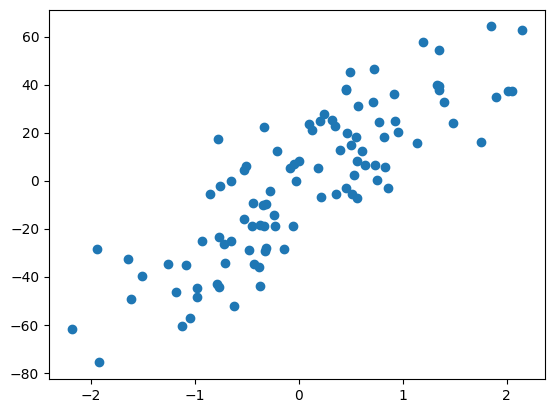

In [240]:
plt.scatter(X,y)

In [241]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [242]:

from sklearn.linear_model import LinearRegression

In [243]:

lr = LinearRegression()

In [244]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [245]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [246]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b

In [247]:
gd = GDRegressor(0.001,50)

In [ ]:
import time

In [248]:
start = time.time()
gd.fit(X_train,y_train)
end = time.time()
print("Time taken to train the model:", end - start)

28.159367347119066 -2.3004574196824854


In [249]:

y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579